In [30]:
import pandas as pd
import polars as pl
import os

In [31]:
os.chdir('/Users/adamwilson/Downloads/')

def bad_lines(line):
    line = line[1:]
    return line

In [32]:
df = pd.read_csv('AIS_2023_05_09.csv', engine='python', on_bad_lines=bad_lines)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7838913 entries, 0 to 7838912
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   MMSI              int64  
 1   BaseDateTime      object 
 2   LAT               float64
 3   LON               float64
 4   SOG               float64
 5   COG               float64
 6   Heading           float64
 7   VesselName        object 
 8   IMO               object 
 9   CallSign          object 
 10  VesselType        float64
 11  Status            float64
 12  Length            float64
 13  Width             float64
 14  Draft             float64
 15  Cargo             float64
 16  TransceiverClass  object 
dtypes: float64(11), int64(1), object(5)
memory usage: 1016.7+ MB


In [27]:
pd.read_csv('AIS_2023_05_25.csv')

ParserError: Error tokenizing data. C error: Expected 17 fields in line 8557561, saw 18


In [8]:
pf = pl.read_csv('AIS_2023_05_09.csv', truncate_ragged_lines=True, infer_schema_length=0)

In [9]:
pf.describe()

statistic,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""count""","""7838912""","""7838913""","""7838913""","""7838913""","""7838913""","""7838913""","""7838913""","""7820817""","""4491588""","""6642868""","""7823830""","""5458928""","""7368939""","""6647100""","""2888826""","""5465817""","""7838913"""
"""null_count""","""1""","""0""","""0""","""0""","""0""","""0""","""0""","""18096""","""3347325""","""1196045""","""15083""","""2379985""","""469974""","""1191813""","""4950087""","""2373096""","""0"""
"""mean""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""min""","""0""","""2023-05-09T00:00:00""","""10""","""-101""","""0""","""0""","""0""","""############""","""IMO0000000""","""-------""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""25%""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""50%""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""75%""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""max""","""999999999""","""368278840""","""85""","""144""","""94""","""99""","""99""","""ZYANA K""","""MAGAS""","""ZYCY2""","""WDN4197""","""9""","""99""","""95""","""9""","""99""","""B"""


In [3]:
polars_lf = (
    #load from parquet file - NOTE scan_ tells polars to be in lazy mode
    pl.scan_parquet('ais data/data/ais_clean/ais_2023_12.parquet')
    #sort by vessel and time
    .sort(['mmsi', 'time'])
    #drop smaller vessels
    .filter(pl.col('length')>100)
    #keep necessary columns
    .select(['mmsi','time', 'status'])
)

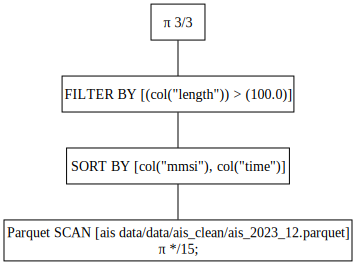

In [4]:
polars_lf.show_graph(optimized=False)

In [6]:
os.chdir('/Users/adamwilson/Library/CloudStorage/OneDrive-WashingtonStateUniversity(email.wsu.edu)/Port Performance/data/AIS/')

pl.read_parquet('2015_3.parquet').head()

mmsi,time,lat,lon,speed,course,heading,status,vessel_name,vessel_type,imo,length,width,draft,cargo
i64,datetime[μs],f64,f64,f64,f64,f64,f64,cat,f64,i64,f64,f64,f64,f64
240830000,2015-03-08 11:56:04,38.95852,-75.18625,0.1,269.2,182.0,1.0,"""TOSKA""",80.0,9408073,275.0,46.0,-10.6,80.0
304010862,2015-03-10 21:35:48,17.08013,-66.29147,7.9,91.6,89.0,0.0,"""MALTE B""",70.0,9194854,86.0,13.0,5.6,70.0
353704000,2015-03-17 15:14:26,31.81082,-79.9755,2.6,129.0,150.0,0.0,"""SUEZ CANAL BRIDGE""",70.0,9230311,285.0,40.0,12.2,70.0
538090207,2015-03-01 07:27:56,46.27267,-123.48717,11.0,269.0,270.0,0.0,"""SANTA FE""",79.0,9233387,190.0,32.0,6.7,79.0
352253000,2015-03-14 11:06:51,48.64993,-125.57692,9.1,230.4,221.0,3.0,"""DELPHINUS LEADER""",70.0,9174282,200.0,32.0,9.3,70.0


In [5]:
%timeit polars_lf.collect()

827 ms ± 20.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
pl.read_parquet('ais data/data/ais_clean/ais_2023_12.parquet').to_pandas().to_parquet('ais data/data/file.parquet')

In [7]:
%%timeit

#read parquet
df = pd.read_parquet('ais data/data/file.parquet', engine='pyarroe')
#sort by mmsi and time
df = df.sort_values(by=['mmsi', 'time'])
#filter by vessel length
df = df[df.length>100]
#drop unused columns
df = df[['mmsi', 'time', 'status']]

9.64 s ± 61 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [47]:
%%timeit

#read parquet
df = pd.read_parquet('ais data/data/file.parquet')[['mmsi','time', 'status', 'length']]
#sort by mmsi and time
df = df.sort_values(by=['mmsi', 'time'])
#drop unused column
df.drop('length', axis=1)

8.63 s ± 78.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
df.head()

,mmsi,time,status,length
4395068,3791472,2023-12-03 05:00:02,15.0,0.0
25290687,3791472,2023-12-03 05:01:13,15.0,0.0
17291722,3791472,2023-12-03 05:02:23,15.0,0.0
3687814,3791472,2023-12-03 05:03:33,15.0,0.0
12929563,3791472,2023-12-03 05:04:43,15.0,0.0


In [12]:
polars_lf.collect().describe()

statistic,mmsi,time,lat,lon,speed,course,heading,status,vessel_name,vessel_type,imo,length,width,draft,cargo
str,f64,str,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64
"""count""",2.612445e7,"""26124450""",2.612445e7,2.612445e7,2.612445e7,2.5866797e7,2.5051266e7,2.6004886e7,"""26124430""",2.612445e7,2.5612927e7,2.5262121e7,2.4205856e7,2.3767489e7,2.6012383e7
"""null_count""",0.0,"""0""",0.0,0.0,0.0,257653.0,1.073184e6,119564.0,"""20""",0.0,511523.0,862329.0,1.918594e6,2.356961e6,112067.0
"""mean""",4.2100e8,"""2023-12-16 11:42:47.758299""",34.309201,-93.473259,5.841383,185.17192,179.456878,1.472441,null,74.058694,1.0934e7,206.659162,31.475104,10.102698,73.473201
"""std""",1.3524e8,null,7.996176,22.291143,6.60804,103.076999,105.663971,2.388082,null,5.254893,3.8703e7,71.472257,10.397438,3.374768,11.141608
"""min""",3.791472e6,"""2023-12-01 00:00:00""",0.56667,-176.18215,0.0,0.0,0.0,0.0,null,70.0,0.0,0.0,0.0,0.0,0.0
"""25%""",3.1600491e8,"""2023-12-08 19:10:14""",29.13888,-117.00366,0.0,101.8,90.0,0.0,null,70.0,9.3146e6,179.0,24.0,8.0,70.0
"""50%""",3.6827039e8,"""2023-12-16 09:53:03""",32.33787,-90.0516,2.1,184.5,176.0,0.0,null,70.0,9.508823e6,199.0,32.0,9.9,71.0
"""75%""",5.38009058e8,"""2023-12-24 07:52:31""",40.59638,-79.66628,11.7,272.8,272.0,3.0,null,80.0,9.730232e6,243.0,36.0,12.4,80.0
"""max""",7.6000398e8,"""2023-12-31 23:59:59""",85.15893,146.61942,102.3,404.0,456.0,15.0,null,89.0,9.901843e8,667.0,78.0,25.5,118.0


In [8]:
df = pl.DataFrame()
for file in [f for f in os.listdir('ais data/data/ais_clean/') if not f.startswith('.')]:
    file_df = pl.read_parquet()

ais_2021_08.parquet
ais_2022_04.parquet
ais_2023_02.parquet
ais_2018_04.parquet
ais_2021_11.parquet
ais_2021_01.parquet
ais_2020_07.parquet
ais_2019_12.parquet
ais_2019_02.parquet
ais_2021_10.parquet
.DS_Store
ais_2018_05.parquet
ais_2019_03.parquet
ais_2020_06.parquet
ais_2021_09.parquet
ais_2022_05.parquet
ais_2023_03.parquet
ais_2021_12.parquet
ais_2021_02.parquet
ais_2018_07.parquet
ais_2019_11.parquet
ais_2019_01.parquet
ais_2020_04.parquet
ais_2022_07.parquet
ais_2019_08.parquet
ais_2023_01.parquet
ais_2022_06.parquet
ais_2019_09.parquet
ais_2018_06.parquet
ais_2020_05.parquet
ais_2019_10.parquet
ais_2020_10.parquet
ais_2019_05.parquet
ais_2018_03.parquet
ais_2021_06.parquet
ais_2020_09.parquet
ais_2022_03.parquet
ais_2020_08.parquet
ais_2023_04.parquet
ais_2022_12.parquet
ais_2022_02.parquet
ais_2019_04.parquet
ais_2020_01.parquet
ais_2020_11.parquet
ais_2021_07.parquet
ais_2018_02.parquet
ais_2018_12.parquet
ais_2022_10.parquet
ais_2018_09.parquet
ais_2019_06.parquet
ais_2020_0

In [4]:
df = (
    #read into lazyframe
    pl.scan_parquet('ais data/data/ais_clean/*.parquet'))

In [5]:
df.collect_schema()

ComputeError: parquet: File out of specification: The file must end with PAR1

In [3]:
import contextily as ctx
import matplotlib.pyplot as plt

#load dock data
docks_gdf = (
    #read in shape file downloaded from USACE
    gpd.read_file('port data/Dock/Dock.shp')
    #drop unneeded columns
    .drop([
        'FID', #randomly assigned table id
        'LONGITUDE', 'LATITUDE', #already coded in 'geometry' 
        'LOCATION_D', #text description of dock location
        'STREET_ADD','ZIPCODE', #street address details
        'PSA_NAME', #statistical area name, rarely used
        'COUNTY_NAM', 'COUNTY_FIP', 'CONGRESS', 'CONGRESS_F', #county and congress info
        'MILE', 'BANK', 'LATITUDE1', 'LONGITUDE1', #redundant locaation data
        'OPERATORS', 'OWNERS', #owner info
        'PURPOSE', #long-form text description of dock uses
        'DOCK', #unknown number (not unique to each row/dock)
        'HIGHWAY_NO', 'RAILWAY_NO', 'LOCATION', #redundant location info
        'COMMODITIE', 'CONSTRUCTI','MECHANICAL', 'REMARKS', 'VERTICAL_D', 
        'DEPTH_MIN', 'DEPTH_MAX','BERTHING_L', 'BERTHING_T', 'DECK_HEIGH', 
        'DECK_HEI_1', #these are rarely used stats on construction
        'SERVICE_IN','SERVICE_TE', #rarely used indicators of data entry date 
    ], axis=1)
    #set coordinate reference system to WGS84 lat/long
    .to_crs('EPSG:4326')
    #rename cols for clarity
    .rename(columns={
        'NAV_UNIT_I':'nav_unit_id',
        'NAV_UNIT_N':'nav_unit_name',
        'FACILITY_T':'facility_type',
        'CITY_OR_TO':'city',
        'STATE_POST':'state'
    })
)
#set col names to pythonic lowercase
docks_gdf.columns = docks_gdf.columns.str.lower()

In [4]:
gdf.geometry.y

NameError: name 'gdf' is not defined

In [5]:
import numpy as np
from sklearn.neighbors import KDTree
np.random.seed(0)
X = np.random.random((5, 2))  # 5 points in 2 dimensions
tree = KDTree(X)
nearest_dist, nearest_ind = tree.query(X, k=2)  # k=2 nearest neighbors where k1 = identity
print(X)
print(nearest_dist[:, 1])    # drop id; assumes sorted -> see args!
print(nearest_ind[:, 1])     # drop id 

[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]]
[0.14306129 0.1786471  0.14306129 0.20869372 0.39536284]
[2 0 0 0 1]


In [9]:
pd.DataFrame(X)

,0,1
0,0.548814,0.715189
1,0.602763,0.544883
2,0.423655,0.645894
3,0.437587,0.891773
4,0.963663,0.383442


In [10]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Set column 'B' to None where column 'A' is equal to 2
df.loc[df['A'] == 2, 'B'] = None

print(df)

   A    B
0  1  4.0
1  2  NaN
2  3  6.0
